# Mission

I wish to examine the behavior of the grovers of grover algorithm in adiabatic computation

## Plan

We start with two hamiltonians over 4 qubits :
$$H_0=  I^{\otimes{4}} - |in><in| $$
$$ \mbox{where}\quad|in> = \frac{1}{\sqrt{N}}\sum^{N-1}_{x=0}|x>$$
$$H_1 = I^{\otimes{4}} -|w><w| $$
$$ \mbox{where}\quad|w> = |0101>$$


In [1]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools

# from importlib import reload 
# reload(LH_tools)

In [3]:
id_3 = tensor([qeye(2)]*3)
psi0 = tensor([basis(2,0)]*3)
psi0= hadamard_transform(3)*psi0
H_0 = id_3-psi0*psi0.trans()
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H_0, psi0)
display(H_0)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 0.875 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125  0.875 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125  0.875 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125  0.875 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125  0.875 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125  0.875 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125  0.875 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125  0.875]]

In [11]:
w = tensor([basis(2,0),basis(2,1),
                   basis(2,0)])


In [10]:
H_0


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 0.875 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125  0.875 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125  0.875 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125  0.875 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125  0.875 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125  0.875 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125  0.875 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125  0.875]]

In [12]:
H_1 = id_3 - w*w.trans()
display(H_1)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

This is the two hamiltonians we will use with in this demo

--- 2.4587535858154297 seconds ---


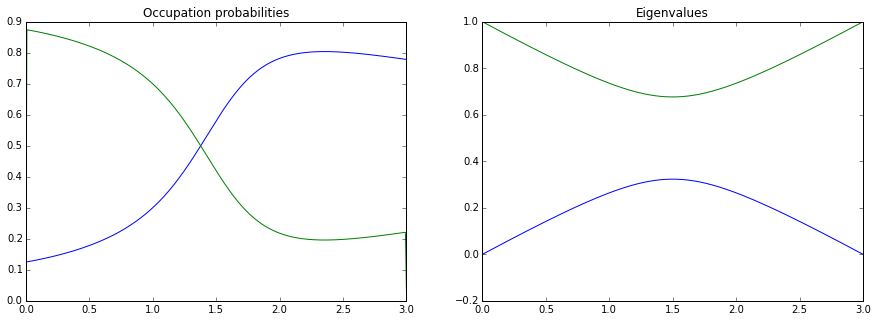

In [21]:
import time
start_time = time.time()

h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]

tlist = np.linspace(0, 3 , 400)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)

print("--- %s seconds ---" % (time.time() - start_time))
LH_tools.plot_PandEV(P_mat, evals_mat, tlist)
pass

In [43]:
P_per_speed = []
evals_per_speed = []
for speed in range(1,50):
    tlist = np.linspace(0, speed, 100)
    args = {'t_max': max(tlist)}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
    P_per_speed.append(P_mat)
    evals_per_speed.append(evals_mat)
    

## Plot the occupation probabilities for two states  

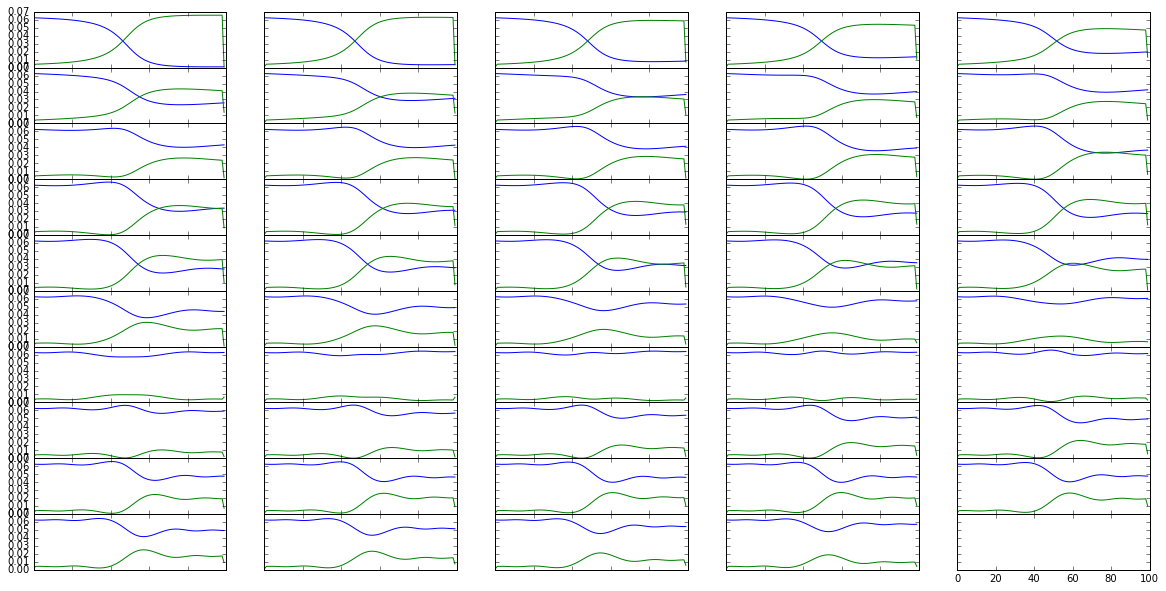

In [44]:
plotarr = []
speed = 0
f, plotarr = plt.subplots(10,5, sharex=True, sharey=True,figsize=(20,10))
try:
    for plot_group in plotarr:
        for plot in plot_group:
            plot.plot(P_per_speed[speed])
            speed+=1
except IndexError:
    pass # ignore
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(hspace=0)

plt.show()


In [8]:
tlist = np.linspace(0, 10, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
plt.plot(evals_mat)


NameError: name 'evals_per_speed' is not defined

--- 151.1129310131073 seconds ---


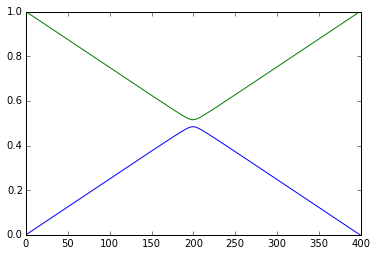

In [81]:
import time
start_time = time.time()


tlist = np.linspace(0, 100, 400)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
plt.plot(evals_mat)

print("--- %s seconds ---" % (time.time() - start_time))

## Comparing the gap of the theoretical model to the gap in simulation
The analytical solution for the  gap in the constant rate case of 10 qubit system is given by :
$\Delta E_{10} = \sqrt{1-4(1-\frac{1}{N})s(s-1)}$
with $ N=2^{\#qubits} = 2^{10} = 1024 $.<br>
Since the process is symmetric (see graph above) we know that 
the minimum gap corresponds to $s=1/2$ so we can compute :
$$\sqrt{1-4(1-\frac{1}{2^{10}})\frac{1}{2}(\frac{1}{2}-1)}=0.03125$$


In [30]:
N = 2**10
np.sqrt(1-4*(1-1/N)*1/4)

0.03125

Now lets examine the result of the simulation:

In [84]:
gap = find_gap(evals_mat) # returns the minimal gap in simulation
display(gap)

0.031350242956488916

The simulated gap accuracy is related to the amount of steps we do in the process, with 100 steps we get relative error:
$$(0.032840421221331018-0.03125)/0.03125 \approxeq 0.051$$
Where using a 1000 step simulation we have the relative error:
$$(0.031266012289474454-0.03125)/0.03125 \approxeq 0.00051$$
The graph below shows the behaviour of the relative gap error compare as a function of number of steps.


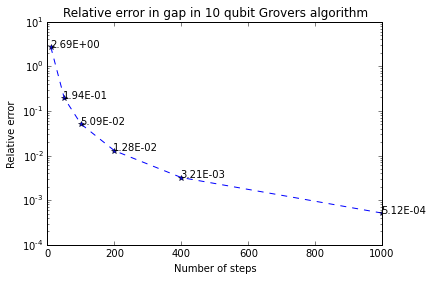

In [87]:
plot_relative_errors_10Q_grover()

In [85]:
(0.031350242956488916-0.03125)/0.03125

0.0032077746076453195

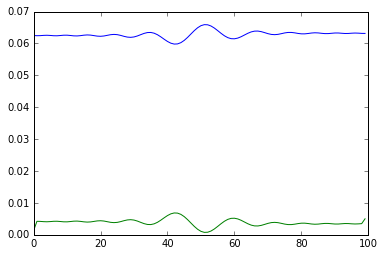

In [46]:
# options = options = Options(nsteps = 100000)
tlist = np.linspace(0, 125, 100)
args = {'t_max': max(tlist)}

P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, rot_psi0, False)
plt.plot(P_mat)

In [9]:
plt.figure(figsize=(20,10))

# Energies 
plt.plot(evals_per_speed[0])
plt.show()




NameError: name 'evals_per_speed' is not defined

In [ ]:


tlist = np.linspace(0, 10, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
plt.plot(evals_mat)


0.03125

# Appendix functions

In [86]:
def plot_relative_errors_10Q_grover():
    steps = [10,50,100,200,400,1000]
    accuracy = [2.691832827964978,
               0.1941827623111756,
               0.05089347908259256,
               0.012833984912113294,
                0.0032077746076453195,
               0.0005123932631825312
               ]

    plt.plot(steps,accuracy,'*--')
    plt.yscale('log')
    for steps,accuracy in zip(steps, accuracy): 
        plt.text(steps, accuracy, str('%.2E'%accuracy))
    plt.title("Relative error in gap in 10 qubit Grovers algorithm")
    plt.xlabel("Number of steps")
    plt.ylabel("Relative error")
    plt.show()


In [83]:
def find_gap(evals_mat):
    """Finds the minimal gap in a list of eiganvalue pairs"""
    min_gap = float("inf")
    for pair in evals_mat:
        dist = abs(pair[0]-pair[1])
        min_gap = min(dist, min_gap)
    return min_gap